In [1]:
import time, random
import pandas as pd
from sklearn.linear_model import LinearRegression

times_df = pd.DataFrame({"length": [i * 1000 for i in range(11)], "ms": None}, dtype=float)
times_df


,length,ms
0,0.0,NaN
1,1000.0,NaN
2,2000.0,NaN
3,3000.0,NaN
4,4000.0,NaN
5,5000.0,NaN
6,6000.0,NaN
7,7000.0,NaN
8,8000.0,NaN
9,9000.0,NaN


In [2]:
def measure_shuffle(list_len):
    nums = list(range(list_len))
    t0 = time.time()
    random.shuffle(nums)
    t1 = time.time()
    return (t1 - t0) * 1000

<Axes: xlabel='length', ylabel='ms'>

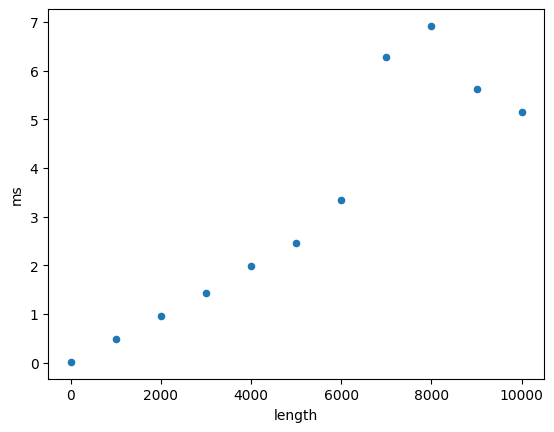

In [3]:
for i in times_df.index:
    length = int(times_df.at[i, "length"])
    times_df.at[i, "ms"] = measure_shuffle(length)

times_df.plot.scatter(x="length", y="ms")


In [5]:
lr = LinearRegression()
lr.fit(times_df[["length"]], times_df["ms"])
prediction = lr.predict([[1000000]])
print(f"Predicted time to shuffle 1,000,000 elements: {prediction[0]:.1f} ms")

Predicted time to shuffle 1,000,000 elements: 683.1 ms


/home/varda/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
actual = measure_shuffle(1000000)
print(f"Actual time to shuffle 1,000,000 elements: {actual:.1f} ms")

Actual time to shuffle 1,000,000 elements: 764.3 ms
